<a href="https://colab.research.google.com/github/Vishnu290504/EDA/blob/main/21bds0073_da1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS**

**DIGITAL ASSIGNMENT - 1**

**NAME:** *VISHNU K*

**REG NO:** *21BDS0073*

[GITHUB LINK](https://github.com/Vishnu290504/EDA/tree/main)

In [2]:
import pandas as pd
df = pd.read_csv("NaturalGas.csv")

In [3]:
df

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


Check duplicates and drop if any

In [4]:
df.duplicated().sum()

0

In [5]:
print("Data Types:", df.dtypes)

Data Types: rownames         int64
state           object
statecode        int64
year             int64
consumption      int64
price          float64
eprice         float64
oprice         float64
lprice         float64
heating          int64
income         float64
dtype: object


In [6]:
print("Dimensions:", df.shape)

Dimensions: (138, 11)


In [7]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std     39.981246   15.68811     6.657415  184478.131559    2.169215   
min      1.000000    5.00000  1967.000000    9430.000000    0.680000   
25%     35.250000   10.00000  1972.000000   49103.500000    1.380000   
50%     69.500000   29.00000  1978.000000  300835.500000    2.775000   
75%    103.750000   44.00000  1984.000000  346428.750000    5.310000   
max    138.000000   45.00000  1989.000000  637289.000000    8.060000   

           eprice      oprice      lprice      heating        income  
count  138.000000  138.000000  138.000000   138.000000    138.000000  
mean     5.053551   24.635580    3.207681  4154.528986  11193.235652  
std      2.577859   15.401018    2.124937  2451.998462   1906.726093  
min      1.980000    5.010000    0.680000   48

In [8]:
print("\nInformation:")
print(df.info())


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     138 non-null    int64  
 1   state        138 non-null    object 
 2   statecode    138 non-null    int64  
 3   year         138 non-null    int64  
 4   consumption  138 non-null    int64  
 5   price        138 non-null    float64
 6   eprice       138 non-null    float64
 7   oprice       138 non-null    float64
 8   lprice       138 non-null    float64
 9   heating      138 non-null    int64  
 10  income       138 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.0+ KB
None


Check for null values and handle if any

In [9]:
df.isnull().any()

,0
rownames,False
state,False
statecode,False
year,False
consumption,False
price,False
eprice,False
oprice,False
lprice,False
heating,False


In [10]:
df.isnull().sum().sum()

0

Get dummies for State column because machine cant work on strings

In [11]:
dummy = pd.get_dummies(df['state'],prefix="State").astype(int)
df1 = pd.concat([df, dummy], axis=1)
df1 = pd.concat([df, dummy], axis=1)
df1.drop(['state'], axis=1, inplace=True)
df1.head()

,rownames,statecode,year,consumption,price,eprice,oprice,lprice,heating,income,State_CA,State_FL,State_MI,State_NY,State_TX,State_UT
0,1,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75,0,0,0,1,0,0
1,2,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02,0,0,0,1,0,0
2,3,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68,0,0,0,1,0,0
3,4,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77,0,0,0,1,0,0
4,5,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42,0,0,0,1,0,0


**Univariate Analysis**

In [12]:
print("\nMode:", df['income'].mode())
print("\nMedian:", df['income'].median())
print("\nMean:", df['income'].mean())


Mode: 0       7465.34
1       7560.08
2       7661.95
3       7865.50
4       7930.66
         ...   
133    15047.09
134    15340.38
135    15532.93
136    15946.92
137    16425.33
Name: income, Length: 138, dtype: float64

Median: 11367.46

Mean: 11193.235652173913


In [13]:
print("\nMode:", df['consumption'].mode())
print("\nMedian:", df['consumption'].median())
print("\nMean:", df['consumption'].mean())


Mode: 0        9430
1       11318
2       11636
3       12837
4       13089
        ...  
133    599631
134    615719
135    630998
136    631398
137    637289
Name: consumption, Length: 138, dtype: int64

Median: 300835.5

Mean: 252901.47826086957


In [14]:
print("\nMode:", df['heating'].mode())
print("\nMedian:", df['heating'].median())
print("\nMean:", df['heating'].mean())


Mode: 0       481
1       507
2       524
3       544
4       569
       ... 
133    7259
134    7263
135    7273
136    7389
137    7440
Name: heating, Length: 138, dtype: int64

Median: 4272.0

Mean: 4154.528985507246


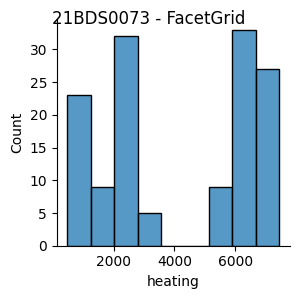

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df1).map(sns.histplot,"heating").add_legend()
g.fig.suptitle('21BDS0073 - FacetGrid', fontsize=12)
plt.show()

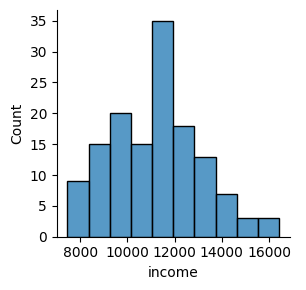

In [16]:
sns.FacetGrid(df1).map(sns.histplot,"income").add_legend()
g.fig.suptitle('21BDS0073 - FacetGrid', fontsize=12)
plt.show()

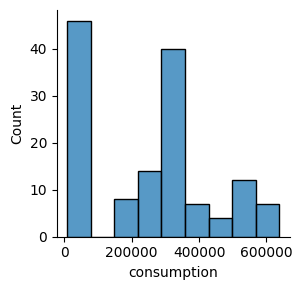

In [17]:
sns.FacetGrid(df1).map(sns.histplot,"consumption").add_legend()
g.fig.suptitle('21BDS0073 - FacetGrid', fontsize=12)
plt.show()

<ipython-input-18-65120153ab4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])


<Axes: xlabel='income', ylabel='Density'>

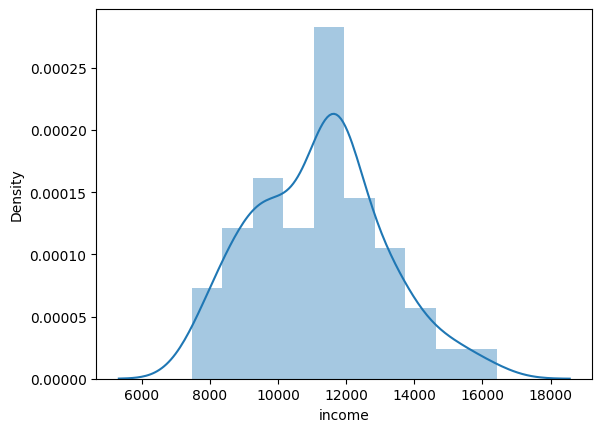

In [18]:
sns.distplot(df['income'])

<ipython-input-19-d31b099595e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['consumption'])


<Axes: xlabel='consumption', ylabel='Density'>

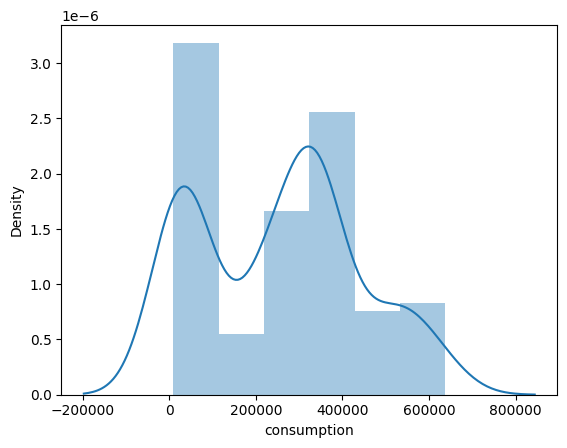

In [19]:
sns.distplot(df['consumption'])

<ipython-input-20-e7897bfa3daa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['heating'])


<Axes: xlabel='heating', ylabel='Density'>

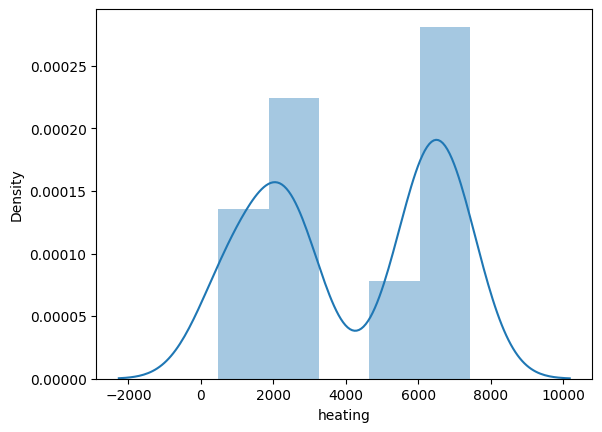

In [20]:
sns.distplot(df['heating'])

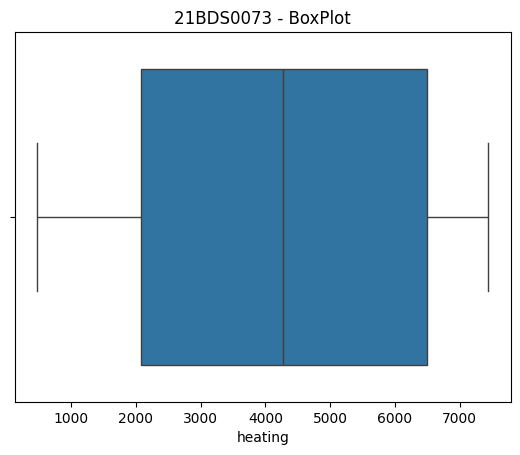

In [21]:
sns.boxplot(x="heating", data=df)
plt.title('21BDS0073 - BoxPlot')
plt.show()

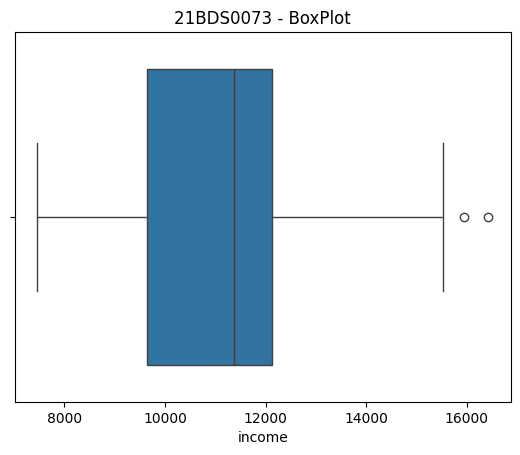

In [22]:
sns.boxplot(x="income",data=df)
plt.title('21BDS0073 - BoxPlot')
plt.show()

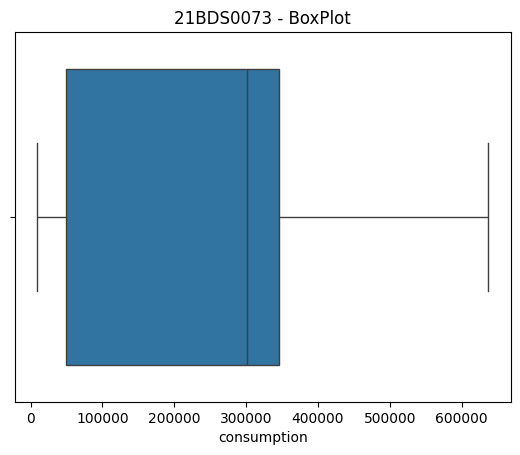

In [23]:
sns.boxplot(x="consumption",data=df)
plt.title('21BDS0073 - BoxPlot')
plt.show()

**Bivariate Analysis**

Text(0, 0.5, 'consumption')

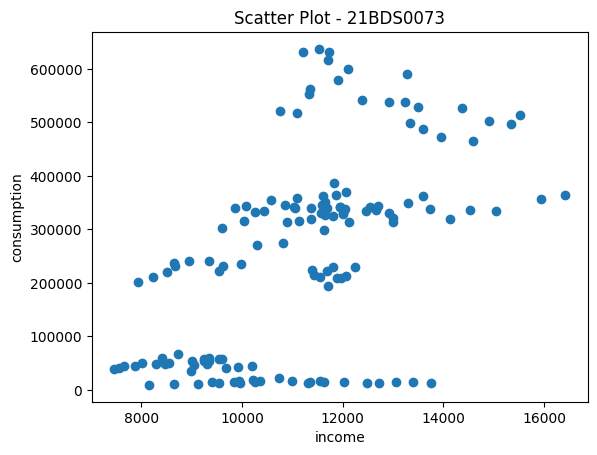

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df["income"], df["consumption"])
plt.title("Scatter Plot - 21BDS0073")
plt.xlabel("income")
plt.ylabel("consumption")

**Multivariate Analysis**

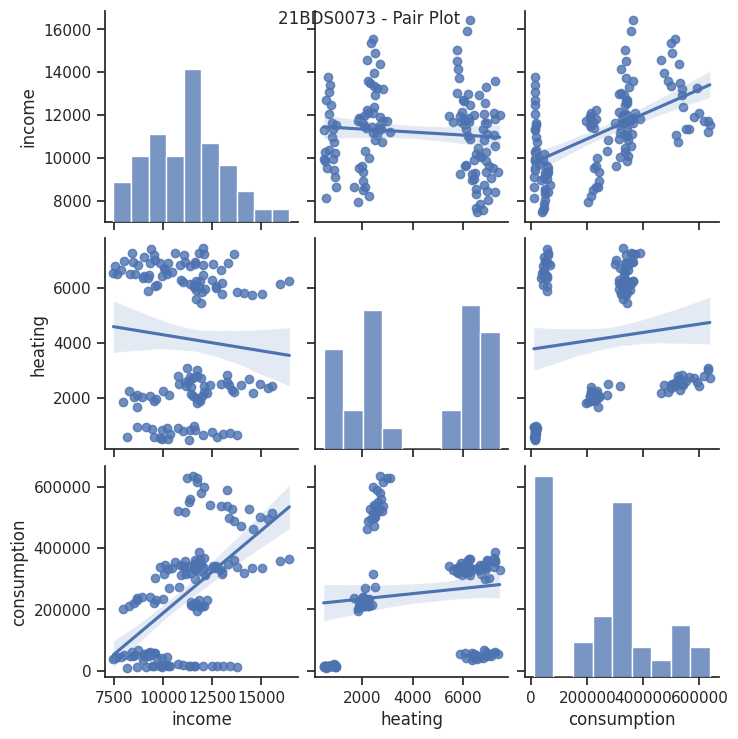

In [25]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['income', 'heating','consumption'],kind="reg").fig.suptitle('21BDS0073 - Pair Plot', fontsize=12)
plt.show()

In [26]:
from scipy import stats
corr = stats.pearsonr(df["income"], df["consumption"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.0892847064421225e-12
cor:		 0.558558951233098


In [27]:
df2=df1.drop(['rownames','statecode','year','State_CA','State_FL'	,'State_MI','State_NY','State_TX','State_UT'],axis=1)
df2

,consumption,price,eprice,oprice,lprice,heating,income
0,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...
133,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,497138,5.64,8.69,34.02,5.26,2366,15340.38


In [28]:
correlation = df2.corr(method='pearson')
correlation

,consumption,price,eprice,oprice,lprice,heating,income
consumption,1.000000,-0.109541,0.045979,0.013371,-0.110035,0.114430,0.558559
price,-0.109541,1.000000,0.935463,0.856882,0.985123,-0.142188,0.658469
eprice,0.045979,0.935463,1.000000,0.875059,0.924900,0.080426,0.709568
oprice,0.013371,0.856882,0.875059,1.000000,0.808498,0.002448,0.595618
lprice,-0.110035,0.985123,0.924900,0.808498,1.000000,-0.141117,0.663339
heating,0.114430,-0.142188,0.080426,0.002448,-0.141117,1.000000,-0.090510
income,0.558559,0.658469,0.709568,0.595618,0.663339,-0.090510,1.000000


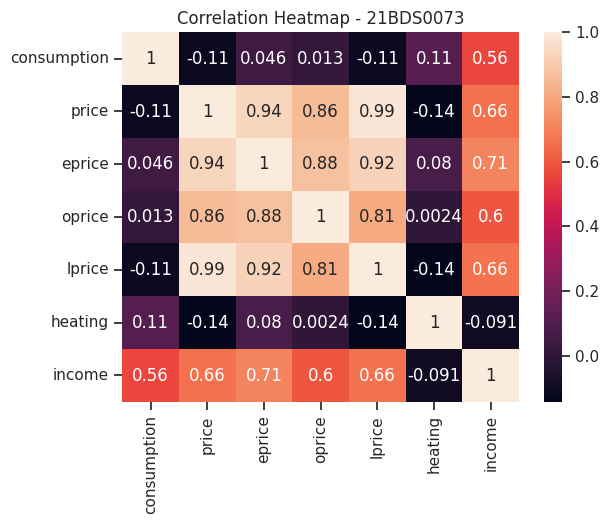

In [29]:
sns.heatmap(correlation, annot=True, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title('Correlation Heatmap - 21BDS0073')
plt.show()

In [30]:
#Geometric Mean

import statistics

def geometric_mean(data):
    return statistics.geometric_mean(data)

heating_gm = geometric_mean(df['heating'])
income_gm = geometric_mean(df['income'])
consumption_gm = geometric_mean(df['consumption'])

print(f"Geometric Mean of heating: {heating_gm}")
print(f"Geometric Mean of income: {income_gm}")
print(f"Geometric Mean of consumption: {consumption_gm}")

Geometric Mean of heating: 3188.162973030389
Geometric Mean of income: 11031.523837304536
Geometric Mean of consumption: 147236.36697527248


In [31]:
#Harmonic Mean

from scipy.stats import hmean

heating_hm = hmean(df['heating'])
income_hm = hmean(df['income'])
consumption_hm = hmean(df['consumption'])
print(f"Harmonic Mean of heating: {heating_hm}")
print(f"Harmonic Mean of income: {income_hm}")
print(f"Harmonic Mean of consumption: {consumption_hm}")

Harmonic Mean of heating: 2170.426247098535
Harmonic Mean of income: 10869.243811877384
Harmonic Mean of consumption: 58549.94621610359


In [32]:
# Range
heating_range = df['heating'].max() - df['heating'].min()
income_range = df['income'].max() - df['income'].min()
consumption_range = df['consumption'].max() - df['consumption'].min()

print(f"Range of heating: {heating_range}")
print(f"Range of income: {income_range}")
print(f"Range of consumption: {consumption_range}")

Range of heating: 6959
Range of income: 8959.990000000002
Range of consumption: 627859


In [33]:
# Variance
heating_var = df['heating'].var()
income_var = df['income'].var()
consumption_var = df['consumption'].var()

print(f"Variance of heating: {heating_var}")
print(f"Variance of income: {income_var}")
print(f"Variance of consumption: {consumption_var}")

Variance of heating: 6012296.455358087
Variance of income: 3635604.3938568723
Variance of consumption: 34032181023.53602


In [34]:
# Standard Deviation
heating_std = df['heating'].std()
income_std = df['income'].std()
consumption_std = df['consumption'].std()

print(f"Standard Deviation of heating: {heating_std}")
print(f"Standard Deviation of income: {income_std}")
print(f"Standard Deviation of consumption: {consumption_std}")

Standard Deviation of heating: 2451.9984615325693
Standard Deviation of income: 1906.7260930340447
Standard Deviation of consumption: 184478.1315590984


In [35]:
# Interquartile Range (IQR)
heating_iqr = stats.iqr(df['heating'])
income_iqr = stats.iqr(df['income'])
consumption_iqr = stats.iqr(df['consumption'])

print(f"IQR of heating: {heating_iqr}")
print(f"IQR of income: {income_iqr}")
print(f"IQR of consumption: {consumption_iqr}")

IQR of heating: 4416.5
IQR of income: 2488.17
IQR of consumption: 297325.25


In [36]:
#Mean deviation

def mean_deviation(data):
  mean = data.mean()
  deviation = data.apply(lambda x: abs(x - mean))
  return deviation.mean()

heating_md = mean_deviation(df['heating'])
income_md = mean_deviation(df['income'])
consumption_md = mean_deviation(df['consumption'])

print(f"Mean Deviation of heating: {heating_md}")
print(f"Mean Deviation of income: {income_md}")
print(f"Mean Deviation of consumption: {consumption_md}")

Mean Deviation of heating: 2349.8768115942025
Mean Deviation of income: 1524.4589287964716
Mean Deviation of consumption: 156073.10964083174


In [37]:
# Skewness
heating_skew = df['heating'].skew()
income_skew = df['income'].skew()
consumption_skew = df['consumption'].skew()

print(f"Skewness of heating: {heating_skew}")
print(f"Skewness of income: {income_skew}")
print(f"Skewness of consumption: {consumption_skew}")

Skewness of heating: -0.10864194566047229
Skewness of income: 0.2441020659812335
Skewness of consumption: 0.18689627507055256


In [38]:
# Kurtosis
heating_kurt = df['heating'].kurt()
income_kurt = df['income'].kurt()
consumption_kurt = df['consumption'].kurt()

print(f"Kurtosis of heating: {heating_kurt}")
print(f"Kurtosis of income: {income_kurt}")
print(f"Kurtosis of consumption: {consumption_kurt}")

Kurtosis of heating: -1.7077040780500734
Kurtosis of income: -0.22781705705239386
Kurtosis of consumption: -0.9746765850042207


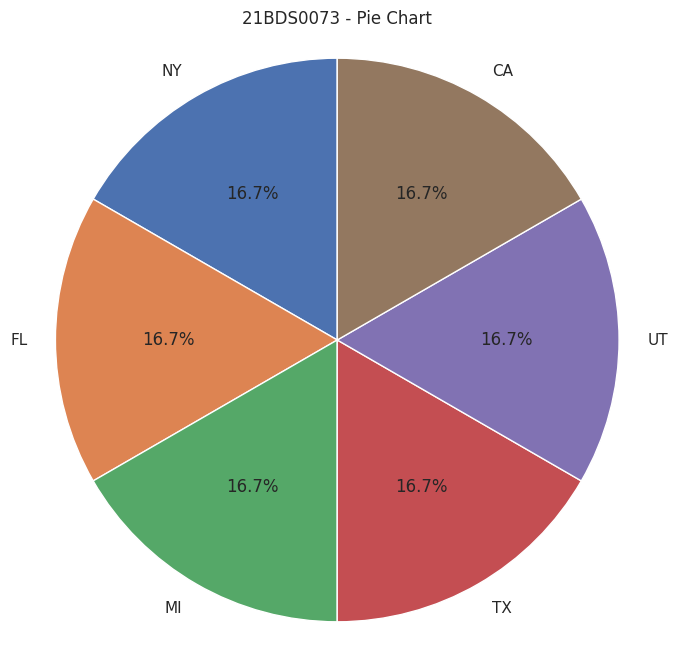

In [39]:
# Pie chart

state_counts = df['state'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('21BDS0073 - Pie Chart')
plt.axis('equal')
plt.show()

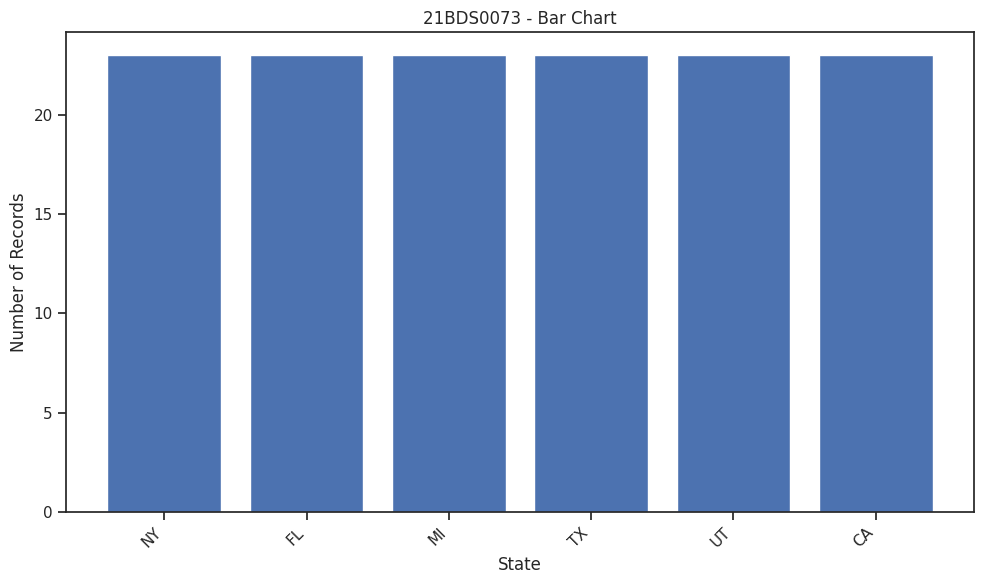

In [40]:
# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel("State")
plt.ylabel("Number of Records")
plt.title("21BDS0073 - Bar Chart")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

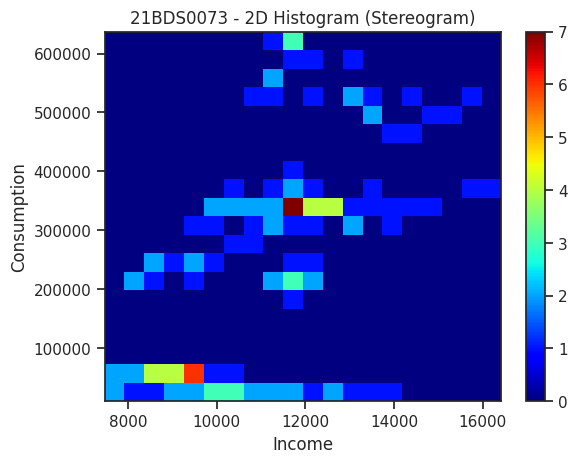

In [41]:
#2D histogram

plt.hist2d(df['income'], df['consumption'], bins=(20, 20), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.title('21BDS0073 - 2D Histogram (Stereogram)')
plt.show()

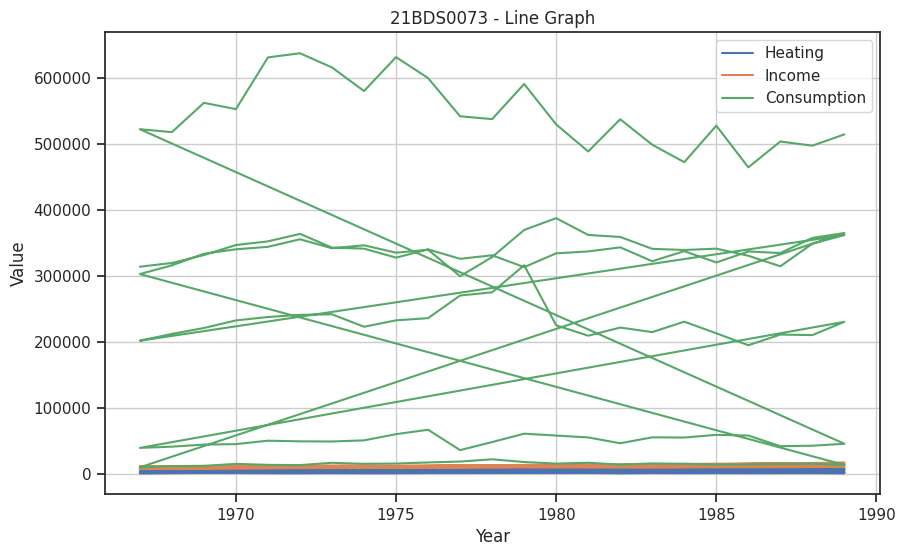

In [42]:
# Line Graph
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['heating'], label='Heating')
plt.plot(df['year'], df['income'], label='Income')
plt.plot(df['year'], df['consumption'], label='Consumption')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('21BDS0073 - Line Graph')
plt.legend()
plt.grid(True)
plt.show()

K-MEANS CLUSTERING

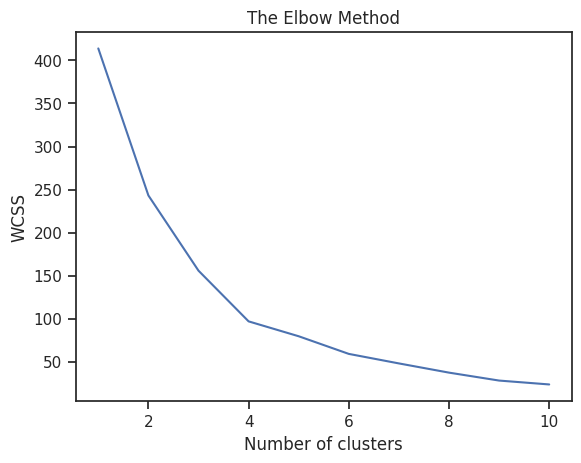

In [43]:
#Find Optimal clusters using Elbow Method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df2[['heating', 'income', 'consumption']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
#Apply KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

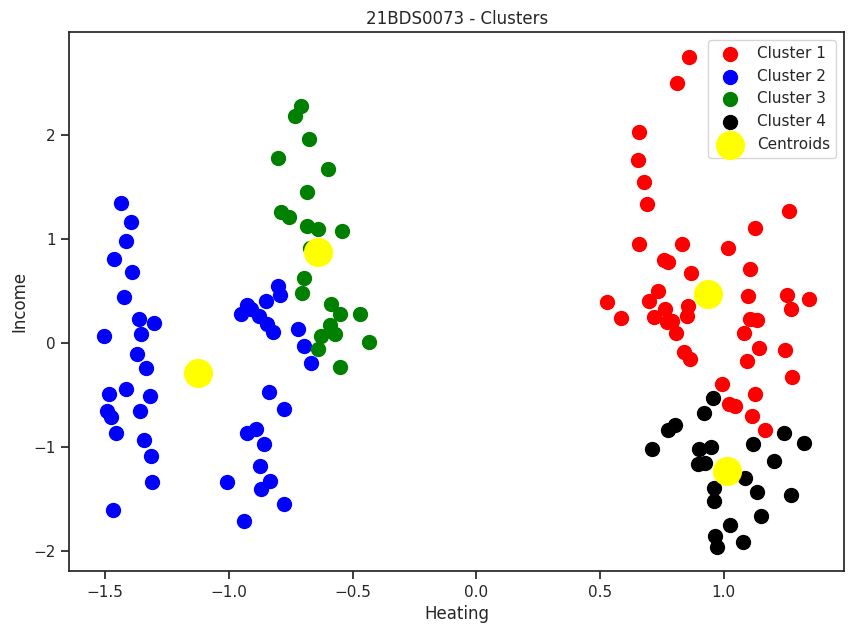

In [45]:
df2['Cluster'] = y_kmeans
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='black', label='Cluster 4')
# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='yellow', label='Centroids')
plt.title('21BDS0073 - Clusters')
plt.xlabel('Heating')
plt.ylabel('Income')
plt.legend()
plt.show()

SPECTRAL CLUSTERING

In [48]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0)
labels = spectral_clustering.fit_predict(X_scaled)
df2['cluster'] = labels
print(df2[['income', 'heating', 'consumption', 'cluster']])

       income  heating  consumption  cluster
0    10903.75     6262       313656        2
1    11370.02     6125       319282        2
2    11578.68     6040       331326        2
3    11586.77     6085       346533        2
4    11657.42     5907       352085        2
..        ...      ...          ...      ...
133  14368.46     2694       527495        0
134  14580.77     2192       464307        0
135  14915.05     2502       503473        0
136  15340.38     2366       497138        0
137  15532.93     2420       514276        0

[138 rows x 4 columns]


HIERARCHICAL CLUSTERING


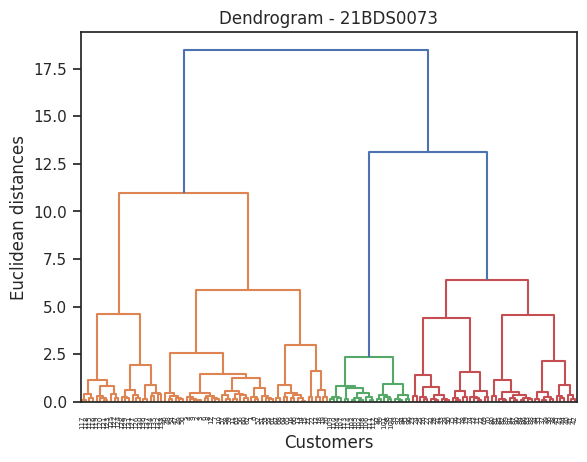

In [52]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram - 21BDS0073')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

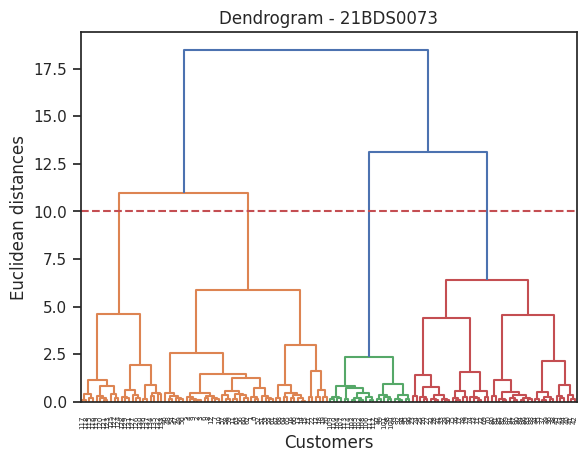

In [60]:
#Optimal Clusters
Z = sch.linkage(X_scaled, method='ward')
dendrogram = sch.dendrogram(Z)
plt.title('Dendrogram - 21BDS0073')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

In [61]:
optimal_clusters = sch.fcluster(Z, t=10, criterion='distance')
print(f"Optimal number of clusters: {len(set(optimal_clusters))}")

Optimal number of clusters: 4


PRINCIPAL COMPONENT ANALYSIS

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
print("Principal Component 1 =", pca.explained_variance_ratio_[0])
print("Principal Component 2 =", pca.explained_variance_ratio_[1])

Principal Component 1 = 0.5196961496881598
Principal Component 2 = 0.3449477673661142


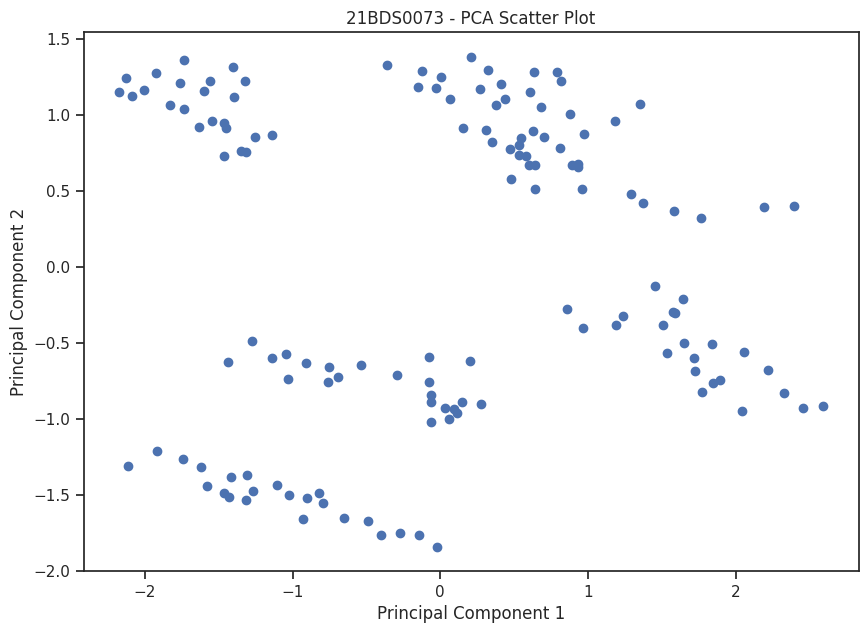

In [68]:
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('21BDS0073 - PCA Scatter Plot')
plt.show()